In [14]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [3]:
dataset = pd.read_csv('C:\\Users\jemmy\Desktop\data\cars.csv')

In [104]:
X = dataset[dataset.columns[:-1]]
#X = X.infer_objects()
X = X.apply(pd.to_numeric, errors ='coerce')
#X = X.infer_objects()
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [105]:
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


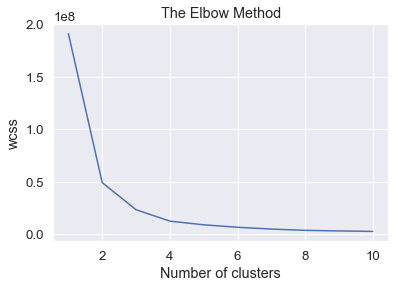

In [106]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [107]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.values

In [93]:
print(y_kmeans)

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]


In [108]:
print(X)

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


<function matplotlib.pyplot.show(close=None, block=None)>

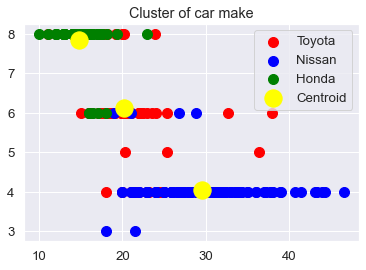

In [110]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red',label='Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue',label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c='green',label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroid')
plt.title('Cluster of car make')
plt.legend()
plt.show